# Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load and Explore the EEG Data

In [2]:
df = pd.read_csv('EEG-HAR_Subject_1_Merged.csv')
print("Columns:")
print(df.columns.tolist())
print("\nFirst 5 rows:")
print(df.head())
print(f"\nTotal shape: {df.shape[0]} rows × {df.shape[1]} columns")

Columns:
['Sample Index', 'EXG Channel 0', 'EXG Channel 1', 'EXG Channel 2', 'EXG Channel 3', 'EXG Channel 4', 'EXG Channel 5', 'EXG Channel 6', 'EXG Channel 7', 'EXG Channel 8', 'EXG Channel 9', 'EXG Channel 10', 'EXG Channel 11', 'EXG Channel 12', 'EXG Channel 13', 'EXG Channel 14', 'EXG Channel 15', 'Accel Channel 0', 'Accel Channel 1', 'Accel Channel 2', 'Not Used 1', 'Digital Channel 0 (D11)', 'Digital Channel 1 (D12)', 'Digital Channel 2 (D13)', 'Digital Channel 3 (D17)', 'Not Used 2', 'Digital Channel 4 (D18)', 'Analog Channel 0', 'Analog Channel 1', 'Analog Channel 2', 'Timestamp', 'Marker Channel', 'Timestamp (Formatted)', 'Activity', 'Timestamp_Gyro', 'Gyro X (°/s)', 'Gyro Y (°/s)', 'Gyro Z (°/s)', 'Activity_Label_x', 'Subject_ID_x', 'Timestamp_Accel', 'Accel X (g)', 'Accel Y (g)', 'Accel Z (g)', 'Activity_Label_y', 'Subject_ID_y']

First 5 rows:
   Sample Index  EXG Channel 0  EXG Channel 1  EXG Channel 2  EXG Channel 3  \
0           6.0 -166914.311578  -72778.933976 -16208

# Count the Activity Labels

In [3]:
df = pd.read_csv('EEG-HAR_Subject_1_Merged.csv')
activity_counts = df['Activity'].value_counts()
print(activity_counts)

Activity
OpenBCISession_s1-seated side bends              105337
OpenBCISession_s1-seated medicine ball twists    104134
OpenBCISession_s1-standing heel to toe walk       98352
OpenBCISession_s1-seated leg extensions           77555
OpenBCISession_s1-wall push-ups                   73358
OpenBCISession_s1-seated boxing hooks             58111
OpenBCISession_s1-light stationary cycling        57162
OpenBCISession_s1-chair squats                    56998
OpenBCISession_s1-side-stepping                   55581
OpenBCISession_s1-marching in place               51220
Name: count, dtype: int64


# Extract EEG Data and Save to New File

In [4]:
df = pd.read_csv('EEG-HAR_Subject_1_Merged.csv')
eeg_columns = [f'EXG Channel {i}' for i in range(16)]
meta_columns = ['Subject_ID_x', 'Activity']
eeg_only_df = df[eeg_columns + meta_columns]
eeg_only_df.to_csv('EEG_Only_Subject1.csv', index=False)
print("Created: EEG_Only_Subject1.csv")
print(f"Shape: {eeg_only_df.shape}")
print(eeg_only_df.head())

Created: EEG_Only_Subject1.csv
Shape: (737808, 18)
   EXG Channel 0  EXG Channel 1  EXG Channel 2  EXG Channel 3  EXG Channel 4  \
0 -166914.311578  -72778.933976 -162089.933406   42949.145192 -149585.562895   
1 -166882.616804  -72250.270516 -158688.869618   43413.860311 -149614.396645   
2 -166881.119237  -73205.584074 -160614.897086   42795.812225 -149898.777890   
3 -166840.126138  -73581.339250 -160860.855682   42779.607210 -150113.734616   
4 -166840.863745  -73833.131651 -159276.966366   42689.417921 -150154.973585   

   EXG Channel 5  EXG Channel 6  EXG Channel 7  EXG Channel 8  EXG Channel 9  \
0 -163687.613748 -164460.179443 -166998.465895 -147736.224262 -166795.780277   
1 -159750.622183 -165931.795947 -166969.542738 -165048.857337 -166773.272070   
2 -162515.778841 -164265.831025 -166965.206500 -148667.040308 -166761.112721   
3 -161619.473889 -166378.562615 -166928.840211 -164713.201191 -166738.045721   
4 -161393.006014 -164366.816207 -166925.152174 -149120.557203 -16671

# Rename Columns and Save the Updated File

In [5]:
df = pd.read_csv('EEG_Only_Subject1.csv')
df = df.rename(columns={
    'Subject_ID_x': 'Subject_ID',
    'Activity': 'Activity_Label_OpenBCI'
})
df.to_csv('EEG_Only_Subject1.csv', index=False)
print("Columns renamed and file updated.")
print("Last 2 columns:", df.columns[-2:].tolist())
print("\nPreview of data:")
print(df.head())
print(f"\nTotal shape: {df.shape[0]} rows × {df.shape[1]} columns")

Columns renamed and file updated.
Last 2 columns: ['Subject_ID', 'Activity_Label_OpenBCI']

Preview of data:
   EXG Channel 0  EXG Channel 1  EXG Channel 2  EXG Channel 3  EXG Channel 4  \
0 -166914.311578  -72778.933976 -162089.933406   42949.145192 -149585.562895   
1 -166882.616804  -72250.270516 -158688.869618   43413.860311 -149614.396645   
2 -166881.119237  -73205.584074 -160614.897086   42795.812225 -149898.777890   
3 -166840.126138  -73581.339250 -160860.855682   42779.607210 -150113.734616   
4 -166840.863745  -73833.131651 -159276.966366   42689.417921 -150154.973585   

   EXG Channel 5  EXG Channel 6  EXG Channel 7  EXG Channel 8  EXG Channel 9  \
0 -163687.613748 -164460.179443 -166998.465895 -147736.224262 -166795.780277   
1 -159750.622183 -165931.795947 -166969.542738 -165048.857337 -166773.272070   
2 -162515.778841 -164265.831025 -166965.206500 -148667.040308 -166761.112721   
3 -161619.473889 -166378.562615 -166928.840211 -164713.201191 -166738.045721   
4 -161393.

# Display Unique Activity Labels

In [6]:
print(df['Activity_Label_OpenBCI'].unique())

['OpenBCISession_s1-seated leg extensions'
 'OpenBCISession_s1-marching in place' 'OpenBCISession_s1-wall push-ups'
 'OpenBCISession_s1-standing heel to toe walk'
 'OpenBCISession_s1-side-stepping' 'OpenBCISession_s1-seated side bends'
 'OpenBCISession_s1-seated medicine ball twists'
 'OpenBCISession_s1-chair squats'
 'OpenBCISession_s1-light stationary cycling'
 'OpenBCISession_s1-seated boxing hooks']


# Count Rows per Activity Label

In [7]:
activity_counts = df['Activity_Label_OpenBCI'].value_counts()
print("Number of rows per activity label:\n")
print(activity_counts)

Number of rows per activity label:

Activity_Label_OpenBCI
OpenBCISession_s1-seated side bends              105337
OpenBCISession_s1-seated medicine ball twists    104134
OpenBCISession_s1-standing heel to toe walk       98352
OpenBCISession_s1-seated leg extensions           77555
OpenBCISession_s1-wall push-ups                   73358
OpenBCISession_s1-seated boxing hooks             58111
OpenBCISession_s1-light stationary cycling        57162
OpenBCISession_s1-chair squats                    56998
OpenBCISession_s1-side-stepping                   55581
OpenBCISession_s1-marching in place               51220
Name: count, dtype: int64


# Plot Activity Counts

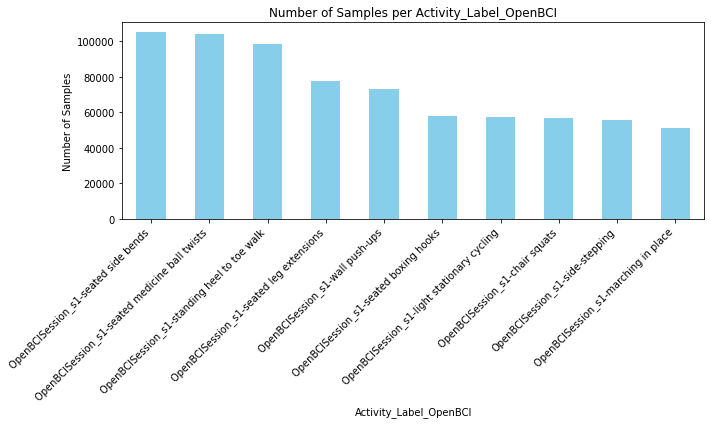

In [8]:
activity_counts = df['Activity_Label_OpenBCI'].value_counts()
plt.figure(figsize=(10,6))
activity_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Samples per Activity_Label_OpenBCI')
plt.xlabel('Activity_Label_OpenBCI')
plt.ylabel('Number of Samples')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Update Activity Labels and Save File

In [9]:
df = pd.read_csv('EEG_Only_Subject1.csv')

df = df.rename(columns={
    'Subject_ID_x': 'Subject_ID',
    'Activity': 'Activity_Label_OpenBCI'
})

df['Subject_ID'] = df['Subject_ID'].replace('Subject 1', 1).astype(int)

activity_mapping = {
    'OpenBCISession_s1-seated leg extensions': 'Seated Leg Extensions',
    'OpenBCISession_s1-marching in place': 'Marching in Place',
    'OpenBCISession_s1-wall push-ups': 'Wall Push-ups',
    'OpenBCISession_s1-seated boxing hooks': 'Seated Boxing Hooks',
    'OpenBCISession_s1-standing heel to toe walk': 'Standing Heel-to-Toe Walk',
    'OpenBCISession_s1-side-stepping': 'Side-Stepping',
    'OpenBCISession_s1-seated side bends': 'Seated Side Bends',
    'OpenBCISession_s1-seated medicine ball twists': 'Seated Medicine Ball Twists',
    'OpenBCISession_s1-chair squats': 'Chair Squats',
    'OpenBCISession_s1-light stationary cycling': 'Light Stationary Cycling'
}

df['Activity_Label_OpenBCI'] = df['Activity_Label_OpenBCI'].replace(activity_mapping)

df.to_csv('EEG_Only_Subject1.csv', index=False)

print("File updated successfully.")
print("Subject_ID is numeric:", df['Subject_ID'].dtype)
print("Unique activity labels now:")
print(df['Activity_Label_OpenBCI'].unique())
print(f"\nFinal shape: {df.shape[0]} rows × {df.shape[1]} columns")
print("\nPreview of data:")
print(df.head())

/tmp/ipykernel_592134/1098558749.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Subject_ID'] = df['Subject_ID'].replace('Subject 1', 1).astype(int)


File updated successfully.
Subject_ID is numeric: int64
Unique activity labels now:
['Seated Leg Extensions' 'Marching in Place' 'Wall Push-ups'
 'Standing Heel-to-Toe Walk' 'Side-Stepping' 'Seated Side Bends'
 'Seated Medicine Ball Twists' 'Chair Squats' 'Light Stationary Cycling'
 'Seated Boxing Hooks']

Final shape: 737808 rows × 18 columns

Preview of data:
   EXG Channel 0  EXG Channel 1  EXG Channel 2  EXG Channel 3  EXG Channel 4  \
0 -166914.311578  -72778.933976 -162089.933406   42949.145192 -149585.562895   
1 -166882.616804  -72250.270516 -158688.869618   43413.860311 -149614.396645   
2 -166881.119237  -73205.584074 -160614.897086   42795.812225 -149898.777890   
3 -166840.126138  -73581.339250 -160860.855682   42779.607210 -150113.734616   
4 -166840.863745  -73833.131651 -159276.966366   42689.417921 -150154.973585   

   EXG Channel 5  EXG Channel 6  EXG Channel 7  EXG Channel 8  EXG Channel 9  \
0 -163687.613748 -164460.179443 -166998.465895 -147736.224262 -166795.78027

# Count the Activity Labels in Updated Data

In [10]:
df = pd.read_csv('EEG_Only_Subject1.csv')
activity_counts = df['Activity_Label_OpenBCI'].value_counts()
print(activity_counts)

Activity_Label_OpenBCI
Seated Side Bends              105337
Seated Medicine Ball Twists    104134
Standing Heel-to-Toe Walk       98352
Seated Leg Extensions           77555
Wall Push-ups                   73358
Seated Boxing Hooks             58111
Light Stationary Cycling        57162
Chair Squats                    56998
Side-Stepping                   55581
Marching in Place               51220
Name: count, dtype: int64


# Map Activity Labels to Numeric Values and Save File

In [11]:
df = pd.read_csv('EEG_Only_Subject1.csv')
df = df.rename(columns={
    'Subject_ID_x': 'Subject_ID',
    'Activity': 'Activity_Label_OpenBCI'
})
df['Subject_ID'] = df['Subject_ID'].replace('Subject 1', 1).astype(int)
activity_mapping_to_numeric = {
    'Seated Leg Extensions': 1,
    'Marching in Place': 2,
    'Wall Push-ups': 3,
    'Seated Boxing Hooks': 4,
    'Standing Heel-to-Toe Walk': 5,
    'Side-Stepping': 6,
    'Seated Side Bends': 7,
    'Seated Medicine Ball Twists': 8,
    'Chair Squats': 9,
    'Light Stationary Cycling': 10
}
df['Activity_Label_OpenBCI'] = df['Activity_Label_OpenBCI'].replace(activity_mapping_to_numeric)
df.to_csv('EEG_Only_Subject1_Updated.csv', index=False)
print("File updated successfully.")
print("Subject_ID is numeric:", df['Subject_ID'].dtype)
print("Unique activity labels now (numeric):")
print(df['Activity_Label_OpenBCI'].unique())
print(f"\nFinal shape: {df.shape[0]} rows × {df.shape[1]} columns")
print("\nPreview of data:")
print(df.head())

/tmp/ipykernel_592134/813363694.py:19: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Activity_Label_OpenBCI'] = df['Activity_Label_OpenBCI'].replace(activity_mapping_to_numeric)


File updated successfully.
Subject_ID is numeric: int64
Unique activity labels now (numeric):
[ 1  2  3  5  6  7  8  9 10  4]

Final shape: 737808 rows × 18 columns

Preview of data:
   EXG Channel 0  EXG Channel 1  EXG Channel 2  EXG Channel 3  EXG Channel 4  \
0 -166914.311578  -72778.933976 -162089.933406   42949.145192 -149585.562895   
1 -166882.616804  -72250.270516 -158688.869618   43413.860311 -149614.396645   
2 -166881.119237  -73205.584074 -160614.897086   42795.812225 -149898.777890   
3 -166840.126138  -73581.339250 -160860.855682   42779.607210 -150113.734616   
4 -166840.863745  -73833.131651 -159276.966366   42689.417921 -150154.973585   

   EXG Channel 5  EXG Channel 6  EXG Channel 7  EXG Channel 8  EXG Channel 9  \
0 -163687.613748 -164460.179443 -166998.465895 -147736.224262 -166795.780277   
1 -159750.622183 -165931.795947 -166969.542738 -165048.857337 -166773.272070   
2 -162515.778841 -164265.831025 -166965.206500 -148667.040308 -166761.112721   
3 -161619.473889

# Count and Sort Activity Labels (Numeric)

In [12]:
df = pd.read_csv('EEG_Only_Subject1_Updated.csv')

activity_counts = df['Activity_Label_OpenBCI'].value_counts().sort_index()

print("Unique activity labels and their counts (sorted 1 → 10):")
print(activity_counts)
print(f"\nTotal count: {activity_counts.sum()}")

Unique activity labels and their counts (sorted 1 → 10):
Activity_Label_OpenBCI
1      77555
2      51220
3      73358
4      58111
5      98352
6      55581
7     105337
8     104134
9      56998
10     57162
Name: count, dtype: int64

Total count: 737808
